In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (
  accuracy_score,
  classification_report,
  confusion_matrix,
  roc_auc_score,
  roc_curve,
  mean_squared_error,
)
import statsmodels.formula.api as smf


# **Hands-On: Advanced Statistical Learning Concepts**
In this hands-on session, we will explore inference and prediction, bias-variance trade-off, train-validate-test split and cross-validation, and loss function optimization. 

Notes:
- Fix hyperlinks, no idea why they don't work
- Hide code in helper function

# **Table of Contents**

1. [**Hands-On: Advanced Statistical Learning Concepts**](#Hands-On-Advanced-Statistical-Learning-Concepts)
2. [**Inference and Prediction**](#Inference-and-Prediction)
   - [Dataset Description](#Dataset-Description)
   - [Logistic Regression for Inference](#Logistic-Regression-for-Inference)
   - [Logistic Regression for Prediction](#Logistic-Regression-for-Prediction)
   - [Overview: Inference vs Prediction](#Overview-Inference-vs-Prediction)
3. [**Polynomial Regression for Bias-Variance Trade-Off**](#Polynomial-Regression-for-Bias-Variance-Trade-Off)
   - [Data Description](#Data-Description)
   - [High-Bias (Underfitting)](#High-Bias-Underfitting)
   - [High-Variance Overfitting](#High-Variance-Overfitting)
   - [Bias-Variance Tradeoff Overview](#Bias-Variance-Tradeoff-Overview)
4. [**Train-Validate-Test Split and Cross-Validation**](#Train-Validate-Test-Split-and-Cross-Validation)
   - [Dataset Description](#Dataset-Description-2)
   - [Why Split Data?](#Why-Split-Data)
   - [Loss Function Optimization](#Loss-Function-Optimization)
   - [Cross-Validation](#Cross-Validation)
5. [**Bonus**](#Bonus)

# **Inference and Prediction**
In the following part, we will explain the Characteristics and Differences between Inference and Prediction using Logistic Regression. We will use the same Dataset for both tasks.

### **Dataset Description**

This dataset contains **clinical and genetic data** for 1,000 individuals. The variables include:

- **Age**: Age of the participant (years).
- **Education**: Number of years of formal education.
- **APOE4**: Genetic marker indicating presence (1) or absence (0) of the APOE4 allele, a known genetic risk factor for Alzheimer's.
- **Cognitive_Score**: Score from a cognitive performance test.
- **Alzheimers**: Binary outcome variable indicating diagnosis of Alzheimer's disease (1 = Yes, 0 = No).

In [499]:
# Load the dataset
data = pd.read_csv('alzheimer_logisticregression.csv')


In [500]:
# Show the first few rows of the dataset
data.head()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
0,73,18.198066,0,29.292511,1
1,68,16.773901,0,19.856534,1
2,75,14.178891,0,25.561481,1
3,82,12.059190,0,28.204429,1
4,68,16.094670,1,27.735338,0


In [501]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int64  
 1   Education        1000 non-null   float64
 2   APOE4            1000 non-null   int64  
 3   Cognitive_Score  1000 non-null   float64
 4   Alzheimers       1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


In [502]:
# Show statistical summary of the dataset
data.describe()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,69.655000,14.212509,0.194000,26.975131,0.409000
std,7.850197,2.992363,0.395627,4.146570,0.491895
min,44.000000,5.178834,0.000000,15.035456,0.000000
25%,64.000000,12.181275,0.000000,24.127411,0.000000
50%,70.000000,14.189231,0.000000,26.994565,0.000000
75%,75.000000,16.186647,0.000000,29.743589,1.000000
max,100.000000,23.579323,1.000000,42.704951,1.000000


In [503]:
# Missing values check
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age                0
Education          0
APOE4              0
Cognitive_Score    0
Alzheimers         0
dtype: int64

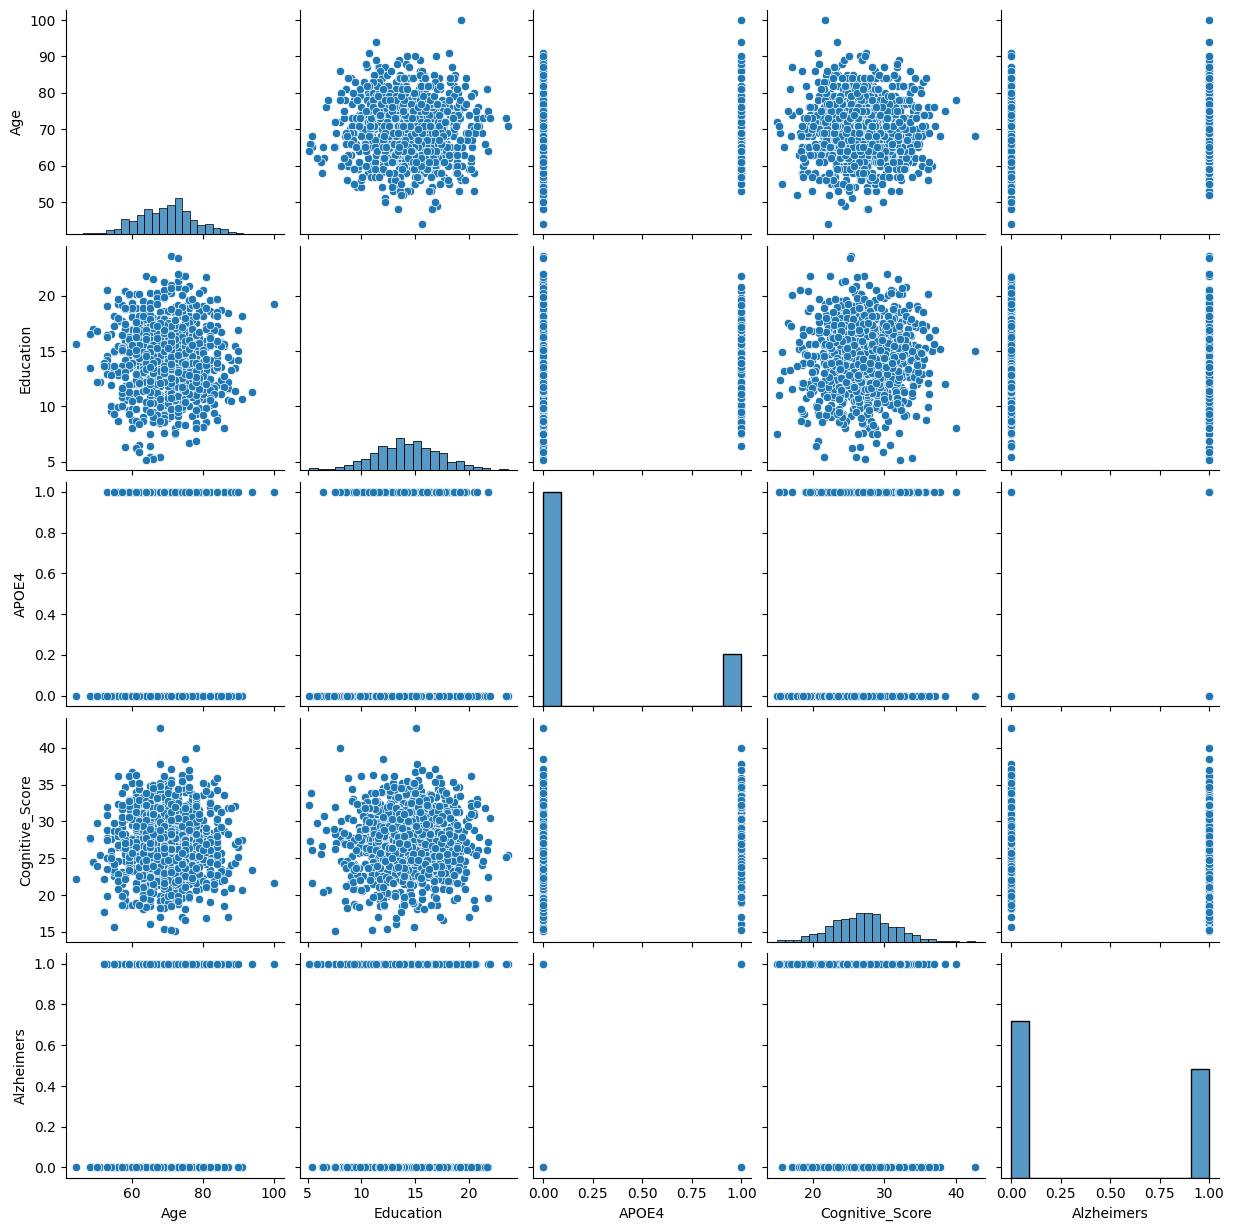

In [504]:
# Show the pairplot
sns.pairplot(data)

We see that a slight majority in this sample does not have Alzheimer, and the majority does not have the APOE4 allele. Otherwise, all continous variables seems normally distributed with no clear outliers visible.

## **Logistic Regression for Inference**

### **Research Question**

> **Which individual-level factors are significantly associated with the probability of developing Alzheimer's disease?**

This analysis aims to evaluate how **age**, **education**, **APOE4 gene status**, and **cognitive test scores** influence the probability of an Alzheimer's diagnosis, using **logistic regression**.

In [505]:

# fit the logistic regression model using a formula
model = smf.logit('Alzheimers ~ Age + Education + APOE4 + Cognitive_Score', data=data).fit()


# Print the summary of the regression results
model.summary()


Optimization terminated successfully.
         Current function value: 0.607860
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Alzheimers   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.1015
Time:                        16:53:53   Log-Likelihood:                -607.86
converged:                       True   LL-Null:                       -676.49
Covariance Type:            nonrobust   LLR p-value:                 1.086e-28
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8991      0.836     -2.271      0.023      -3.538      -0.260
Age                 0.0639      0.009      6.868      0.000       0.046       0.082
Education          -0.0122      0.023     -0.527      0.598      -0.058       0.033
APOE4               1.1528      0.175      6.588      0.000       0.810       1.496
Cognitive_Score    -0.1115      0.017     -6.415      0.000      -0.146      -0.077
===================================================================================
"""

While the raw coefficients in logistic regression reflect changes in the log-odds of the outcome, these are not easy to interpret. **Therefore, we exponentiate the coefficients to express them as multiplicative changes in the odds of the outcome (i.e., $\frac{P(Y=1)}{1 - P(Y=1)}$)**.

In [506]:
# Extract the coefficients
coefficients = model.params

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)
print("Change in Odds:\n", odds_ratios, "\n")

# Calculate percent change in odds
percent_change = (odds_ratios - 1) * 100
print("Percent change in Odds:\n", percent_change)

Change in Odds:
 Intercept          0.149701
Age                1.065967
Education          0.987861
APOE4              3.167066
Cognitive_Score    0.894453
dtype: float64 

Percent change in Odds:
 Intercept          -85.029939
Age                  6.596709
Education           -1.213922
APOE4              216.706576
Cognitive_Score    -10.554732
dtype: float64


### Logistic Regression Interpretation (Exponentiated Coefficients)
**Outcome: Diagnosis of Alzheimer’s Disease (1 = Alzheimer’s, 0 = No Alzheimer’s)**


- **Age**
  - Coefficient: 0.0639 → Odds Ratio: **1.066**
    - *Remember: Odds Ratio here refers to Odds of one unit increase / Odds*
  - Interpretation: Each additional year of age increases the odds of an Alzheimer’s diagnosis by **6.5%**.
  - P-value: 0.000 → **Highly Statistically significant**

- **Education**
  - Coefficient: -0.0122 → Odds Ratio: **0.988**
  - Interpretation: Each additional year of education slightly reduces the odds of an Alzheimer’s diagnosis by **1.2%**, but this effect is **not statistically significant**.
  - P-value: 	0.598

- **APOE4**
  - Coefficient: 1.1528 → Odds Ratio: **3.167**
  - Interpretation: Individuals with the APOE4 allele have **3.17 times higher odds** (or increased odds by 217%) of being diagnosed with Alzheimer’s.
  - P-value: 0.000 → **Highly statistically significant**

- **Cognitive Score**
  - Coefficient: -0.1115 → Odds Ratio: **0.894**
  - Interpretation: Each unit increase in cognitive score **reduces the odds** of an Alzheimer’s diagnosis by **10.5%**.
  - P-value: 0.000 → **Highly Statistically significant**


## **Logistic Regression for Prediction**

Prediction focuses on building a model that generalizes well to unseen data, such as new patients. The primary goal is to accurately predict outcomes based on input features. Unlike inference, which emphasizes interpreting coefficients and their significance, prediction prioritizes the model's performance on left-out test data.

### **Research Question**

> **"How accurately can a logistic regression model predict the likelihood of Alzheimer's disease based on clinical and genetic features?"**

### Why Use `scikit-learn` for Prediction?

In this section, we use **`scikit-learn`** for building and evaluating the logistic regression model. While **`statsmodels`** is excellent for interpreting coefficients and statistical significance, **`scikit-learn`** is better suited for **prediction tasks** due to the following:

1. **Prediction Focus**: It’s optimized for evaluating models on unseen data.
2. **Ease of Use**: Built-in tools for train-test split, predictions, and performance metrics.
3. **Efficiency**: Handles larger datasets and faster computations.

Using **`scikit-learn`**, we focus on the practical application of logistic regression for predictive accuracy.

### Train-Test Split

To evaluate the performance of our prediction model, we divide the dataset into two parts: **training data** and **testing data**. The training data is used to build the model, while the testing data is kept aside to assess how well the model performs on unseen data. 

(Note: We will discuss the concept of train-test split and its importance in detail later.), TODO maybe explain what random_state is

In [434]:
# Step 1: Split the dataset into training and testing sets

# Define input (X) and target (y)
X = data[["Age", "Education", "APOE4", "Cognitive_Score"]]  # Input variables
y = data["Alzheimers"]  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 2: Fit the logistic regression model 'Alzheimers ~ Age + Education + APOE4 + Cognitive_Score'
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [436]:
# Step 3: Make predictions on the test data
y_pred = log_reg.predict(X_test)  # Predicted values
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

### Evaluating Performance

To assess the quality of our prediction model, we use **Accuracy**. Accuracy is the ratio of correct predictions out of all predictions. For example, an Accuracy of 0.7 equals 70% of correct predictions. In a later lecture, we will introduce new metrics.

We also use a **confusion matrix** to visualize how often the model correctly predicted "No" (true negatives) and "Yes" (true positives), as well as the errors (false positives and false negatives).

Accuracy: 0.70


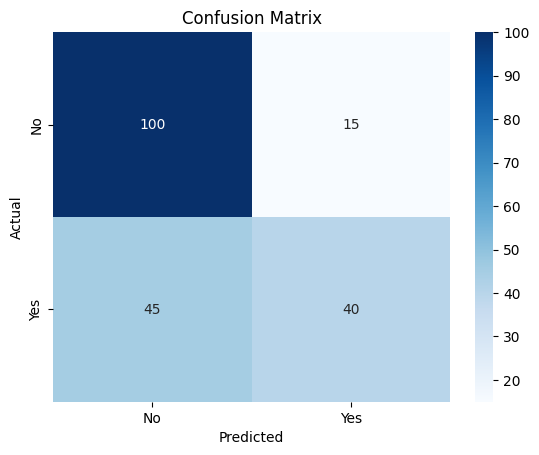

In [ ]:

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Overview: Inference vs Prediction
| Aspect               | Inference                                      | Prediction                                   |
|----------------------|------------------------------------------------|---------------------------------------------|
| **Goal**            | Understand relationships between variables   | Build a model to predict new outcomes       |
| **Focus**           | Coefficients and their significance          | Model performance metrics (e.g., accuracy)  |
| **Data**            | Entire dataset                              | Train-test split                            |
| **Evaluation**      | Statistical significance tests              | Metrics like Accuracy    |

Inference helps us understand the underlying relationships in the data, while prediction focuses on making accurate forecasts for new observations.

---
# Polynomial Regression for Bias-Variance Trade-Off

### What is Bias-Variance Tradeoff?
When fitting a model, we balance two key sources of error:
- **Bias**: The error introduced by assuming a simple model (e.g., linear) that cannot capture the true relationship in the data (**underfitting**).
- **Variance**: The error introduced by fitting a model that is too complex and overly sensitive to small fluctuations in the training data (**overfitting**).

### Why Does This Matter in Healthcare?
In healthcare, understanding trends (like how ferritin levels change with age) is critical for deriving insights and making decisions. **Overfitting** can lead to models that describe noise instead of meaningful patterns, which can mislead clinical interpretations. The goal is to find a balance between underfitting and overfitting to make accurate and reliable predictions.

### Data Description

The dataset includes measurements of **Ferritin concentration** in males across a continuous age range from **10 to 99 years**. Each observation consists of:

- `Age`: A continuous numeric variable representing the age of the individual (in years).
- `Ferritin`: A numeric variable representing ferritin concentration levels (in µg/L), a biomarker commonly used to assess iron status in the body.


In [439]:
data = pd.read_csv('ferritin_polynomialregression.csv')


In [440]:
data.head()

,Age,Ferritin
0,10.000000,121.015013
1,12.282051,75.433148
2,14.564103,67.513758
3,16.846154,76.032161
4,19.128205,67.744043


In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       40 non-null     float64
 1   Ferritin  40 non-null     float64
dtypes: float64(2)
memory usage: 772.0 bytes


In [442]:
data.describe()

,Age,Ferritin
count,40.000000,40.000000
mean,54.500000,136.895485
std,26.678211,29.968738
min,10.000000,67.513758
25%,32.250000,123.403273
50%,54.500000,147.632773
75%,76.750000,158.593932
max,99.000000,179.275427


In [443]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age         0
Ferritin    0
dtype: int64

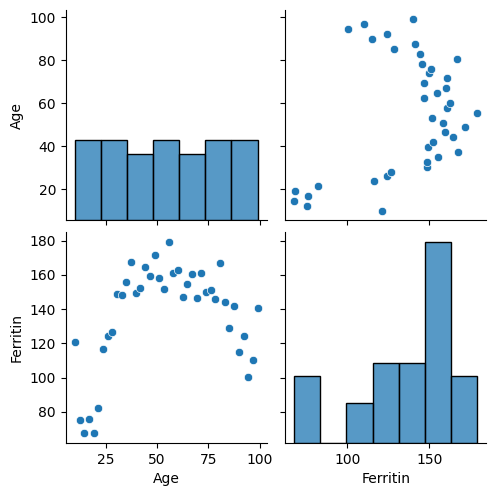

In [444]:
sns.pairplot(data)

## High-Bias (Underfitting)

### Visualizing High Bias with a Linear Model

To illustrate **high bias**, we fit a simple **linear regression model** to the Ferritin-Age data. This model fails to capture the non-linear trend in the data, leading to poor predictions on both training and testing data. If a model is not flexible enough to capture underlying trends in the observed data, it is **underfitting**.


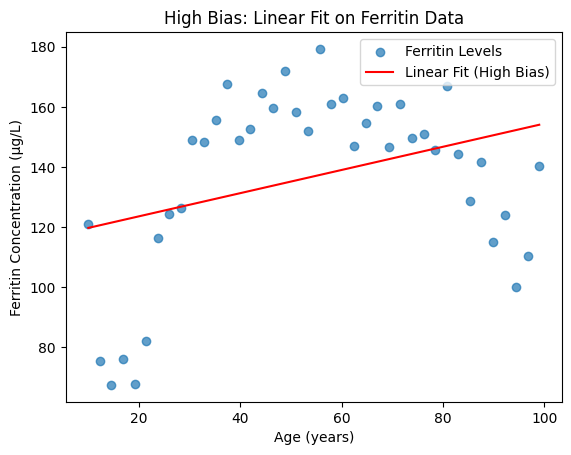

In [445]:


# Fit a linear model
linear_model = LinearRegression()
linear_model.fit(data[["Age"]], data["Ferritin"])
predictions = linear_model.predict(data[["Age"]])

# Plot the linear fit
plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")
plt.plot(data["Age"], predictions, color="red", label="Linear Fit (High Bias)")
plt.title("High Bias: Linear Fit on Ferritin Data")
plt.xlabel("Age (years)")
plt.ylabel("Ferritin Concentration (µg/L)")
plt.legend()
plt.show()

### Visualizing Low Variance with Linear Models

To illustrate **low variance**, we fit multiple linear models on random subsets of the data. The models are consistent and show little variability, but they all fail to capture the true trend, reinforcing the concept of **high bias**.


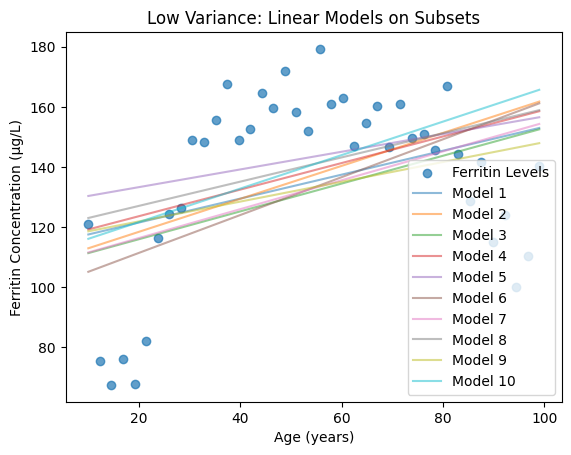

In [446]:

#TODO: maybe add this function to the helper ones
# Function to fit linear models on subsets
def plot_low_variance(data):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")
    
    for i in range(10):  # Fit 10 models on random subsets
        subset = data.sample(frac=0.7, random_state=i)
        model = LinearRegression()
        model.fit(subset[["Age"]], subset["Ferritin"])
        predictions = model.predict(data[["Age"]])
        plt.plot(data["Age"], predictions, alpha=0.5, label=f"Model {i+1}")
    
    plt.title("Low Variance: Linear Models on Subsets")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend()
    plt.show()

# Plot low variance
plot_low_variance(data)

## High-Variance Overfitting

### Visualizing Low Bias with Higher-Degree Polynomial Models

To illustrate **low bias**, we fit a **15th-degree polynomial regression model** to the Ferritin-Age data. The model captures the non-linear trend very well, reducing bias, but it is very sensible to the data points chosen. When fitting different models on subsets of the data we see a relevant Variance between the model. If a model is too flexible, it capture illusory trends created by noise in the data. This is called **overfitting**.


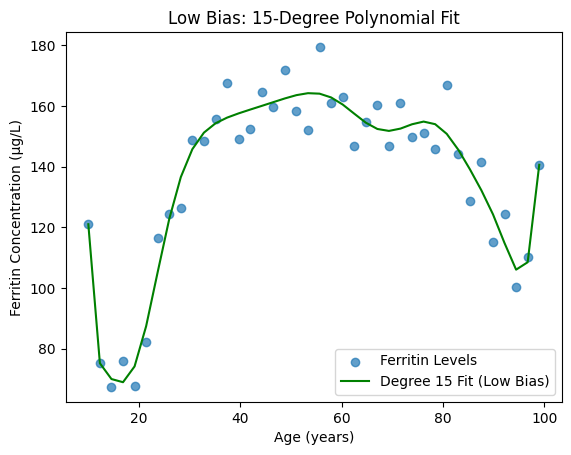

In [447]:
# Fit the interpolating polynomial
degree = 15
coefficients = np.polyfit(data["Age"], data["Ferritin"], deg=degree)#deg=len(subset) - 1)
polynomial = np.poly1d(coefficients)

# Predict for the full dataset
predictions = polynomial(data["Age"])

plt.ylim(data["Ferritin"].min() - 5, data["Ferritin"].max() + 5)

# Plot the higher-degree polynomial fit
plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")
plt.plot(data["Age"], predictions, color="green", label=f"Degree {degree} Fit (Low Bias)")
plt.title(f"Low Bias: {degree}-Degree Polynomial Fit")
plt.xlabel("Age (years)")
plt.ylabel("Ferritin Concentration (µg/L)")
plt.legend()
plt.show()

### Visualizing High Variance with Higher-Degree Models

To illustrate **high variance**, we fit multiple **15th-degree polynomial models** on random subsets of the data. These models vary significantly, showing how overly complex models are sensitive to small changes in the training data.


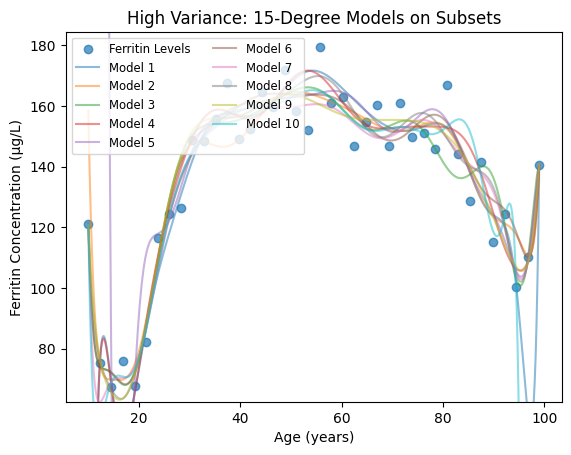

In [451]:
# Function to fit high-degree models on subsets
def plot_high_variance(data, degree):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")
    
    for i in range(10):  # Fit 10 models on random subsets
        subset = data.sample(frac=0.8, random_state=i)
        
        # Fit the interpolating polynomial
        coefficients = np.polyfit(subset["Age"], subset["Ferritin"], deg=degree)
        polynomial = np.poly1d(coefficients)
        
        # Predict for the full dataset
        # Plot the polynomial fit
        X_range = np.linspace(data["Age"].min(), data["Age"].max(), 500)  # Generate evenly spaced points for smooth curve
        y_range = polynomial(X_range)
        plt.plot(X_range, y_range, alpha=0.5, label=f"Model {i+1}")

    plt.ylim(data["Ferritin"].min() - 5, data["Ferritin"].max() + 5)
    
    plt.title(f"High Variance: 15-Degree Models on Subsets")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend(loc="upper left", fontsize="small", ncol=2)
    plt.show()

# Plot high variance using interpolating polynomials
plot_high_variance(data, degree=degree)

## Bias-Variance Tradeoff Overview
As we increase the polynomial degree, the models become more flexible and better at capturing the training data (lower bias). However, this flexibility comes at the cost of increased sensitivity to noise in the data (higher variance).

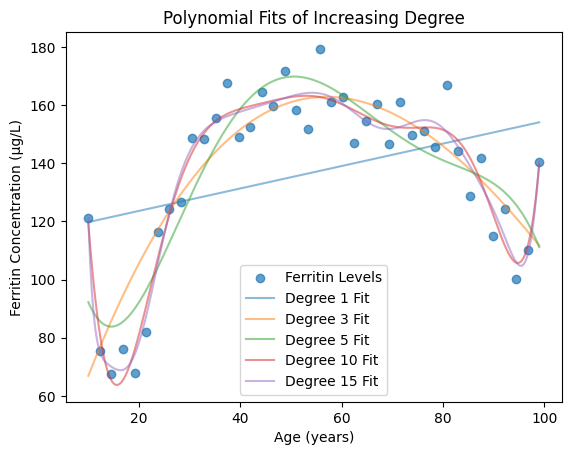

In [452]:
# Polynomial regression function
def fit_and_plot_polynomial(data, degrees):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7, label="Ferritin Levels")

    for degree in degrees:
        #poly = PolynomialFeatures(degree=degree)
        #X_poly = poly.fit_transform(data[["Age"]])
        #model = LinearRegression().fit(X_poly, data["Ferritin"])
        #predictions = model.predict(X_poly)
        
        # Fit the interpolating polynomial
        coefficients = np.polyfit(data["Age"], data["Ferritin"], deg=degree)
        polynomial = np.poly1d(coefficients)
        X_range = np.linspace(data["Age"].min(), data["Age"].max(), 500)  # Generate evenly spaced points for smooth curve
        y_range = polynomial(X_range)
        plt.plot(X_range, y_range, alpha=0.5, label=f"Degree {degree} Fit")
        # Plot the polynomial fit
        #plt.plot(data["Age"], predictions, label=f"Degree {degree}")
    
    plt.title("Polynomial Fits of Increasing Degree")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend()
    plt.show()

# Fit and plot for degrees 1, 3, 5, and 10
fit_and_plot_polynomial(data, degrees=[1, 3, 5, 10, 15])

With low-degree polynomials (e.g., degree 1), both training and testing errors are high due to underfitting, as the model fails to capture the true trend in the data.
As the degree increases, the training error decreases steadily. However, the testing error first decreases, then begins to rise due to overfitting, as the model starts learning noise rather than general patterns.

The sweet spot lies where testing error is minimized. This is the point where the model achieves the best balance between bias (underfitting) and variance (overfitting).

In practice, selecting the right model complexity is crucial for developing predictive models that generalize well to unseen data. This balance ensures that the model captures meaningful patterns without being overly influenced by random variations in the data.

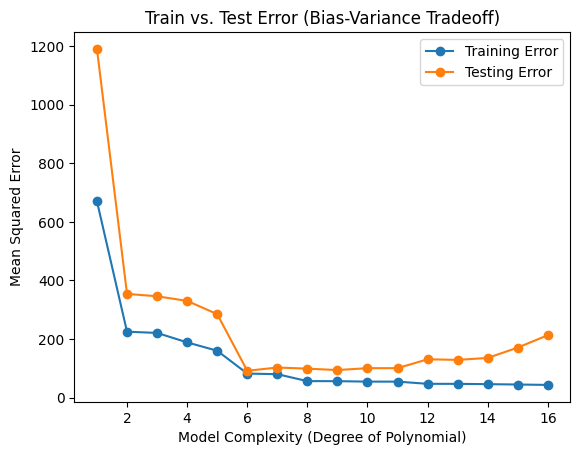

In [453]:
degree = 16

# Split the data
X = data[["Age"]]
y = data["Ferritin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate MSE for different polynomial degrees
train_errors = []
test_errors = []


for deg in range(1, degree + 1):  
    # Fit the interpolating polynomial
    X_train_1d = X_train.values.ravel()  # Convert X_train to a 1D array
    X_test_1d = X_test.values.ravel()  # Convert X_test to a 1D array
    
    coefficients = np.polyfit(X_train_1d, y_train, deg=deg)
    polynomial = np.poly1d(coefficients)
    
    # Predict for the train and test datasets
    y_train_pred = polynomial(X_train_1d)
    y_test_pred = polynomial(X_test_1d)
    
    # Calculate mean squared errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
# Plot the errors
plt.plot(range(1, degree + 1), train_errors, label="Training Error", marker="o")
plt.plot(range(1, degree + 1), test_errors, label="Testing Error", marker="o")
plt.title("Train vs. Test Error (Bias-Variance Tradeoff)")
plt.xlabel("Model Complexity (Degree of Polynomial)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

---
# Train-Validate-Test Split and Cross-Validation

When working with large datasets and complex relationships in the data, we aim to build models that can accurately capture these relationships. However it is difficult to guess what model is suitable with which parameters is suitable on the given dataset. As we have seen in the previous example, if we are not careful our models may under- or overfit to the training data and therefore miss to capture the true trend. To avoid this, we train our model on a subset of all available data and optimise it based on the left out data.

We split the data into 3 parts:
- **Training Set**: Used to train the model and learn patterns from the data.
- **Validation Set**: Used to evaluate the model during training and guide hyperparameter optimization. This ensures the model is not overfitting the training data.
- **Test Set**: Used only once at the end to provide an unbiased evaluation of the final model's performance on unseen data.


### Dataset Description

Let's look at the Dataset first. We simulate a dataset where the goal is to predict a patient's **Cognitive Score after Therapy** based on:
- **Therapy Duration** (sessions/week),
- **Patient Age** (years),

The dataset includes noise to reflect variability in real-world patient outcomes.

In [454]:
data = pd.read_csv('therapy_influence_regression.csv')

In [455]:
data.head()


,age,therapy_duration,cognitive_score_after
0,78,91.066289,53.552816
1,68,31.089082,2.371287
2,54,63.933650,47.284756
3,47,40.171920,30.404847
4,60,109.576360,79.006036


In [456]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    120 non-null    int64  
 1   therapy_duration       120 non-null    float64
 2   cognitive_score_after  120 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [457]:
data.describe()


,age,therapy_duration,cognitive_score_after
count,120.000000,120.000000,120.000000
mean,59.275000,71.329300,45.201352
std,11.889521,28.046583,24.229595
min,40.000000,20.052038,-4.753585
25%,48.000000,46.875450,26.845405
50%,60.000000,70.104625,42.594175
75%,68.000000,91.142980,65.342489
max,79.000000,119.774049,109.529815


In [458]:
print("\nMissing Values:")
data.isnull().sum()



Missing Values:


age                      0
therapy_duration         0
cognitive_score_after    0
dtype: int64

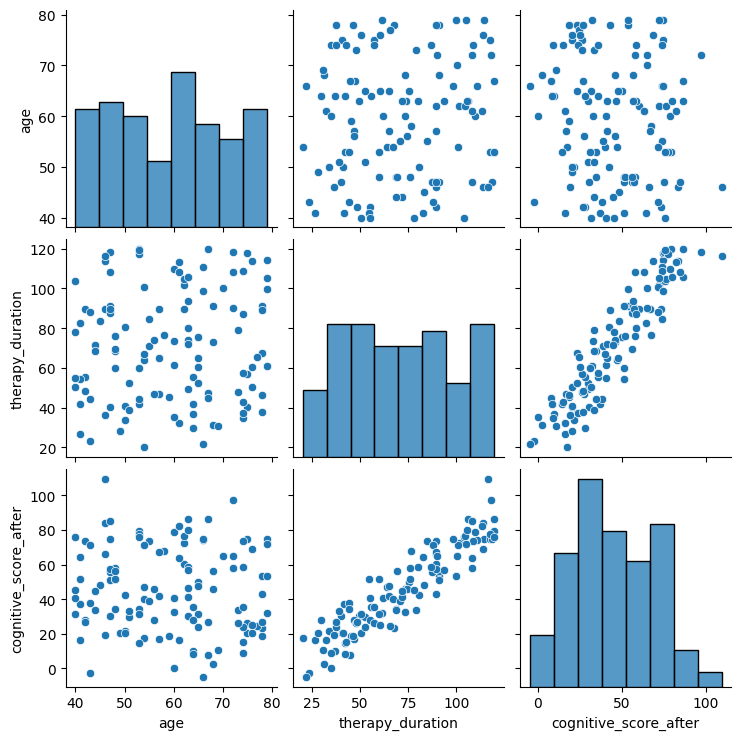

In [459]:
sns.pairplot(data)

## Why Split Data?

When building predictive models, we want to ensure our model works well on **unseen patients** (not just the data we trained on).  
- If we only measure performance on the training data, we risk **overfitting**—building a model that memorizes, not generalizes.
- **Validation sets** help us tune model choices (degree of polynomial, regularisation, etc.) without peeking at the test data.
- **Test sets** give a final, unbiased estimate of how well our model will perform on new patients.

A common way to split the data is:
- 80% Training Data
- 10% Validation
- 10% Test

However other splits, such as 90% Training data, is also common. Additionally if there's no need for tuning of the model, the Validation set is often left out (as we have done in the previous example).

In [460]:
# Features and target
X = data[["therapy_duration"]].values.flatten()
y = data["cognitive_score_after"].values

# Train-test split (80-20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=40)
# Validation-test split (50-50 from remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 96
Validation set size: 12
Test set size: 12


## Loss Function Optimization



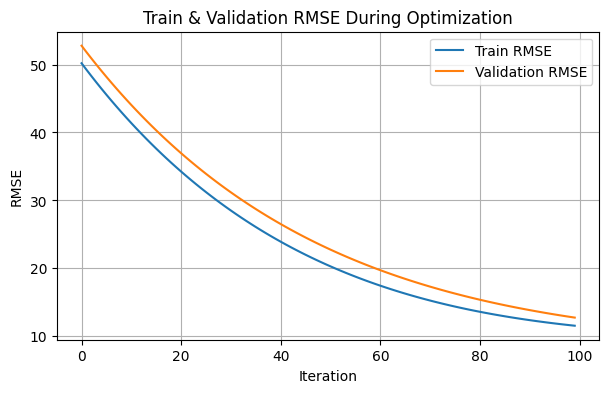

Final Train RMSE:      11.474
Final Validation RMSE: 12.639
Final Test RMSE:       14.113


In [461]:

# Normalize using training set statistics
mean_X = X_train.mean()
std_X = X_train.std()
X_train_norm = (X_train - mean_X) / std_X
X_val_norm = (X_val - mean_X) / std_X
X_test_norm = (X_test - mean_X) / std_X

# Initialize parameters
w0 = 0.0
w1 = 0.0
learning_rate = 0.01
n_iter = 100

rmse_train_history = []
rmse_val_history = []

for i in range(n_iter):
    # --- Training predictions and gradients ---
    y_pred_train = w0 + w1 * X_train_norm
    error_train = y_pred_train - y_train
    rmse_train = np.sqrt(np.mean(error_train ** 2))
    rmse_train_history.append(rmse_train)
    
    # --- Validation predictions ---
    y_pred_val = w0 + w1 * X_val_norm
    error_val = y_pred_val - y_val
    rmse_val = np.sqrt(np.mean(error_val ** 2))
    rmse_val_history.append(rmse_val)
    
    # --- Parameter updates using training gradients ---
    grad_w0 = 2 * np.mean(error_train)
    grad_w1 = 2 * np.mean(error_train * X_train_norm)
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

# Plot RMSE curves
plt.figure(figsize=(7,4))
plt.plot(rmse_train_history, label="Train RMSE")
plt.plot(rmse_val_history, label="Validation RMSE")
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Train & Validation RMSE During Optimization')
plt.legend()
plt.grid(True)
plt.show()

# Final RMSEs
y_pred_train_final = w0 + w1 * X_train_norm
y_pred_val_final = w0 + w1 * X_val_norm
y_pred_test_final = w0 + w1 * X_test_norm

rmse_train_final = np.sqrt(np.mean((y_pred_train_final - y_train) ** 2))
rmse_val_final = np.sqrt(np.mean((y_pred_val_final - y_val) ** 2))
rmse_test_final = np.sqrt(np.mean((y_pred_test_final - y_test) ** 2))

print(f"Final Train RMSE:      {rmse_train_final:.3f}")
print(f"Final Validation RMSE: {rmse_val_final:.3f}")
print(f"Final Test RMSE:       {rmse_test_final:.3f}")

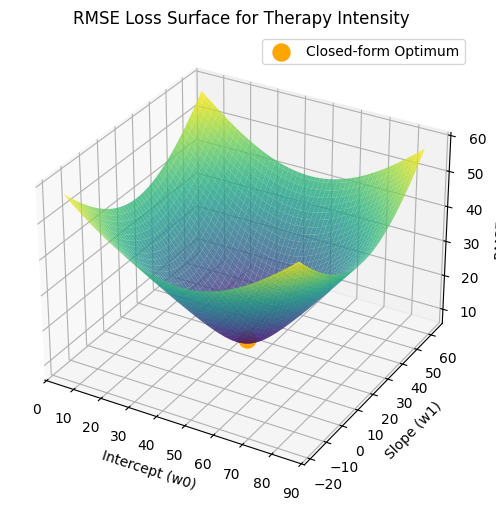

In [462]:
# Closed-form solution for reference
X_design = np.vstack([np.ones_like(X_norm), X_norm]).T
opt_w = np.linalg.lstsq(X_design, y, rcond=None)[0]
opt_w0, opt_w1 = opt_w

# Center grid around closed-form optimum
w0_center, w1_center = opt_w0, opt_w1

w0_range = np.linspace(w0_center - 40, w0_center + 40, 100)
w1_range = np.linspace(w1_center - 40, w1_center + 40, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
rmse_surface = np.zeros(W0.shape)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        y_pred_grid = W0[i, j] + W1[i, j] * X_norm
        rmse_surface[i, j] = np.sqrt(np.mean((y - y_pred_grid) ** 2))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, rmse_surface, cmap='viridis', alpha=0.8)
ax.set_xlabel('Intercept (w0)')
ax.set_ylabel('Slope (w1)')
ax.set_zlabel('RMSE Loss')
ax.set_title('RMSE Loss Surface for Therapy Intensity')

#ax.scatter(w0, w1, rmse_history[-1], color='red', s=60, label='Iterative Optimum')
ax.scatter(opt_w0, opt_w1, np.sqrt(np.mean((y - (opt_w0 + opt_w1 * X_norm))**2)), 
           color='orange', s=150, label='Closed-form Optimum')
ax.legend()
plt.show()

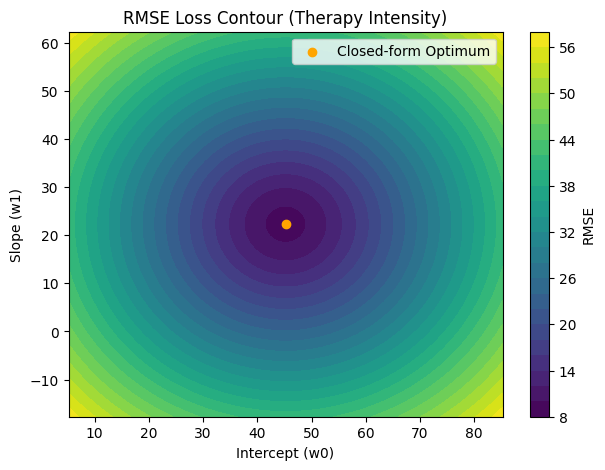

In [463]:
plt.figure(figsize=(7,5))
cp = plt.contourf(W0, W1, rmse_surface, levels=30, cmap='viridis')
plt.xlabel('Intercept (w0)')
plt.ylabel('Slope (w1)')
plt.title('RMSE Loss Contour (Therapy Intensity)')
plt.colorbar(cp, label='RMSE')
plt.scatter([opt_w0], [opt_w1], c='orange', label='Closed-form Optimum')
plt.legend()
plt.show()

## Cross-Validation

In healthcare, data is often limited, making it challenging to evaluate model performance reliably. **Cross-Validation** addresses this by splitting the dataset into multiple subsets (or "folds"). The model is trained on some folds and validated on the remaining fold, rotating through all folds. This ensures every data point is used for both training and validation, providing a more robust estimate of model performance. It helps avoid overfitting and ensures the model generalizes well to unseen data.


In [464]:
X_full = data[["age", "therapy_duration"]]
y_full = data["cognitive_score_after"]

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_full)

model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_poly, y_full, scoring='neg_mean_squared_error', cv=cv)

print("Cross-validated MSE scores:", -scores)
print("Mean CV MSE:", -scores.mean())

Cross-validated MSE scores: [72.10954778 97.63945174 90.98038271 56.90343779 86.12780667]
Mean CV MSE: 80.75212533607535


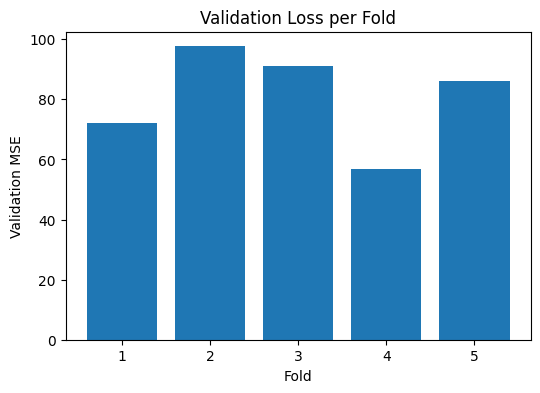

In [465]:
# Set up
X = data[["age", "therapy_duration"]].values
y = data["cognitive_score_after"].values
degree = 2
kf = KFold(n_splits=5, shuffle=True, random_state=1)
poly = PolynomialFeatures(degree)

# To store results
fold_models = []
fold_losses = []
fold_val_indices = []

# Cross-validation loop
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]
    
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(y_val, y_val_pred)
    
    fold_models.append(model)
    fold_losses.append(mse)
    fold_val_indices.append(val_idx)

# ---- Barplot of test losses ----
plt.figure(figsize=(6,4))
plt.bar(range(1,6), fold_losses)
plt.xlabel("Fold")
plt.ylabel("Validation MSE")
plt.title("Validation Loss per Fold")
plt.show()

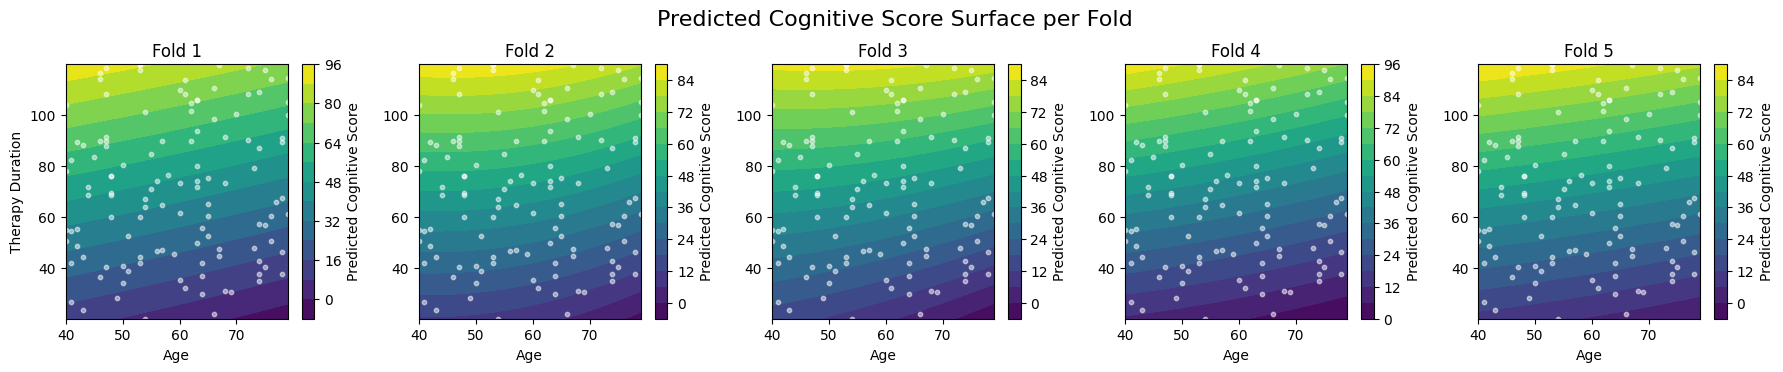

In [466]:
# Prepare grid for full 2D surface
age_grid = np.linspace(data["age"].min(), data["age"].max(), 100)
therapy_grid = np.linspace(data["therapy_duration"].min(), data["therapy_duration"].max(), 100)
A, T = np.meshgrid(age_grid, therapy_grid)
AT_grid = np.c_[A.ravel(), T.ravel()]

plt.figure(figsize=(18, 3.5))
for fold_idx, model in enumerate(fold_models):
    # Predict over grid
    AT_poly = poly.transform(AT_grid)
    Z = model.predict(AT_poly).reshape(A.shape)
    
    plt.subplot(1, 5, fold_idx+1)
    cp = plt.contourf(A, T, Z, levels=15, cmap='viridis')
    plt.scatter(data["age"], data["therapy_duration"], c='white', s=10, alpha=0.5)
    plt.title(f"Fold {fold_idx+1}")
    plt.xlabel("Age")
    if fold_idx == 0:
        plt.ylabel("Therapy Duration")
    plt.colorbar(cp, label="Predicted Cognitive Score")

plt.tight_layout()
plt.suptitle("Predicted Cognitive Score Surface per Fold", y=1.05, fontsize=16)
plt.show()

# Bonus